In [1]:
from pathlib import Path
import sys
import os
parent_dir = Path(os.getcwd()).parent 
sys.path.append(str(parent_dir / "src" / "pendulum"))

## Single Pendulum


In [2]:
from single import SinglePendulum, SinglePendulumAnimator
p1 = SinglePendulum().from_yaml(str(parent_dir / "config" / "single.yaml"))

In [3]:
p1

SinglePendulum(init_cond=InitialCondition(theta_vec=[80.0, 0.0]), time_coord=TimeCoordinate(T=30.0, N_t=301), m1=1.0, L1=1.0, g=9.8)

In [4]:
df1 = p1.gen_sol_df()
df1

,theta,theta_dot,x,y,time_step,energy_kinetic,energy_potential,energy_total
0,1.396263,0.000000,0.984808,-0.173648,0.0,0.000000,8.098248,8.098248
1,1.348080,-0.962153,0.975301,-0.220880,0.1,0.462869,7.635379,8.098248
2,1.204570,-1.901356,0.933685,-0.358095,0.2,1.807578,6.290670,8.098248
3,0.970103,-2.770324,0.824944,-0.565214,0.3,3.837347,4.260901,8.098248
4,0.655675,-3.483127,0.609694,-0.792637,0.4,6.066087,2.032161,8.098248
...,...,...,...,...,...,...,...,...
296,1.365679,0.767243,0.979037,-0.203682,29.6,0.294331,7.803919,8.098250
297,1.394265,-0.196391,0.984459,-0.175616,29.7,0.019285,8.078965,8.098250
298,1.326523,-1.156196,0.970313,-0.241852,29.8,0.668395,7.429855,8.098250
299,1.163989,-2.086098,0.918389,-0.395679,29.9,2.175902,5.922347,8.098250


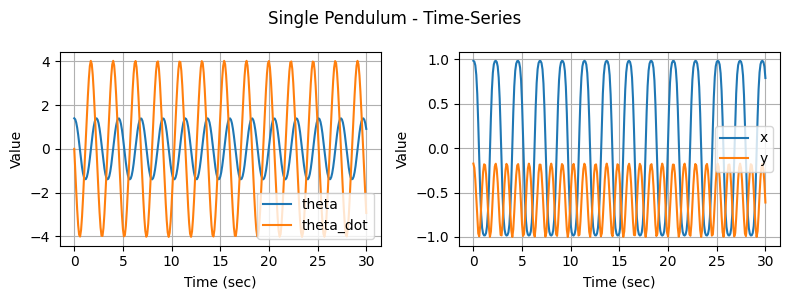

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(8, 3))
list_values = [["theta", "theta_dot"], ["x", "y"]]
T = (df1.time_step.max())
for i, ax in enumerate(axes.reshape(2,)):
    values = list_values[i]
    df1.set_index("time_step")[values].loc[:T].plot(ax=ax)
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Value")
    ax.grid()
fig.suptitle("Single Pendulum - Time-Series")
fig.tight_layout()
fig.savefig("fig/single_pendulum_time_series.png", dpi=200, facecolor='white')


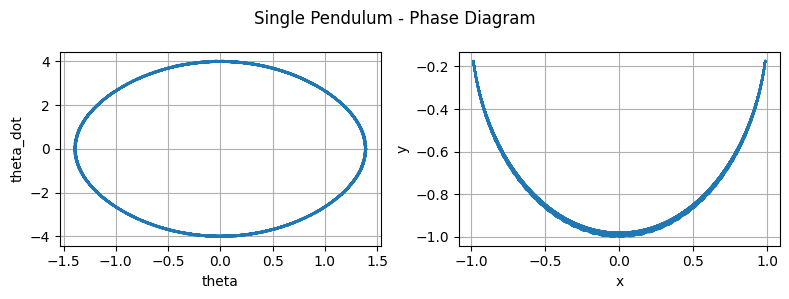

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(8, 3))
for i, ax in enumerate(axes.reshape(2,)):
    [x_val, y_val] = list_values[i]
    ax.plot(df1[x_val], df1[y_val])
    ax.set_ylabel(y_val)
    ax.set_xlabel(x_val)
    ax.grid()
fig.suptitle("Single Pendulum - Phase Diagram")
fig.tight_layout()
fig.savefig("fig/single_pendulum_phase_diagram.png", dpi=200, facecolor='white')

# df1.set_index("theta")[["theta_dot"]].plot(ax=ax)

MovieWriter imagemagick unavailable; using Pillow instead.


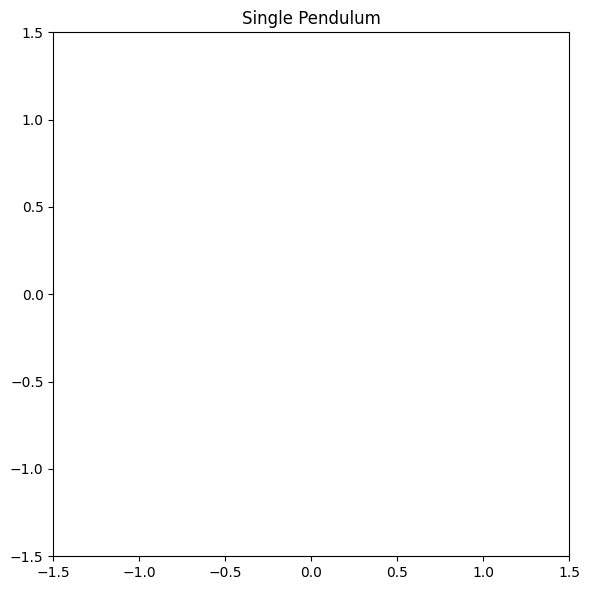

In [7]:
animator1 = SinglePendulumAnimator(df=df1, size=p1.L1)
animator1.init_canvas()
anim1 = animator1.run(frames=int(df1.shape[0] / 2), interval=10)
animator1.save(anim1, gif_file="fig/single_pendulum.gif", fps=60)

# Double Pendulum


In [8]:
from double import DoublePendulum, DoublePendulumAnimator

In [9]:
p2 = DoublePendulum().from_yaml(str(parent_dir / "config" / "double.yaml"))

In [10]:
p2

DoublePendulum(init_cond=InitialCondition(theta_vec=[60.0, 0.0, 80.0, 0.0]), time_coord=TimeCoordinate(T=30.0, N_t=301), m1=1.0, L1=1.0, g=9.8, m2=2.0, L2=1.5)

In [11]:
df2 = p2.gen_sol_df()
df2

,theta1,theta1_dot,theta2,theta2_dot,x1,y1,x2,y2,time_step,energy_kinetic,energy_potential,energy_total
0,1.047198,0.000000,1.396263,0.000000,0.866025,-0.500000,2.343237,-0.760472,0.0,0.000000,53.694744,53.694744
1,1.018004,-0.574335,1.382312,-0.286385,0.851061,-0.525066,2.324495,-0.806122,0.1,1.140385,52.554359,53.694744
2,0.936084,-1.036532,1.336163,-0.656654,0.805242,-0.592946,2.264142,-0.941676,0.2,4.462467,49.232277,53.694744
3,0.817752,-1.287869,1.246166,-1.169757,0.729611,-0.683863,2.151264,-1.162300,0.3,9.677689,44.017054,53.694744
4,0.688068,-1.253934,1.096934,-1.839504,0.635046,-0.772474,1.969765,-1.456964,0.4,16.321483,37.373261,53.694744
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.979844,-0.529643,0.596764,-2.706673,0.830411,-0.557152,1.673364,-1.797889,29.6,20.893449,32.801278,53.694727
297,0.839008,-2.282340,0.365279,-1.885447,0.743981,-0.668201,1.279796,-2.069237,29.7,27.300143,26.394584,53.694727
298,0.522613,-4.045373,0.231530,-0.733525,0.499146,-0.866518,0.843346,-2.326493,29.8,34.285863,19.408864,53.694727
299,0.060423,-4.752477,0.198706,-0.302882,0.060386,-0.998175,0.356488,-2.468659,29.9,38.362563,15.332163,53.694727


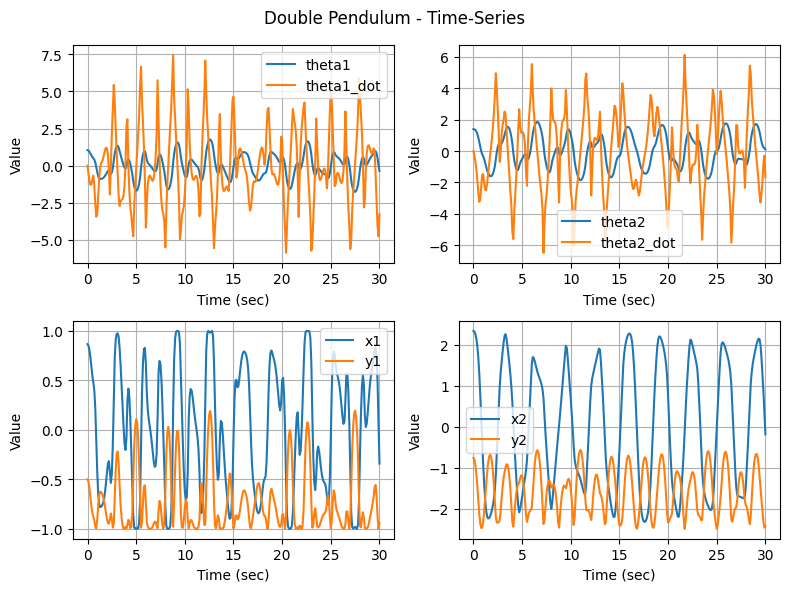

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(8, 6))
list_values = [["theta1", "theta1_dot"], ["theta2", "theta2_dot"], ["x1", "y1"], ["x2", "y2"]]
T = (df2.time_step.max())
for i, ax in enumerate(axes.reshape(4,)):
    values = list_values[i]
    df2.set_index("time_step")[values].loc[:T].plot(ax=ax)
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Value")
    ax.grid()
fig.suptitle("Double Pendulum - Time-Series")
fig.tight_layout()
fig.savefig("fig/double_pendulum_time_series.png", dpi=200, facecolor='white')


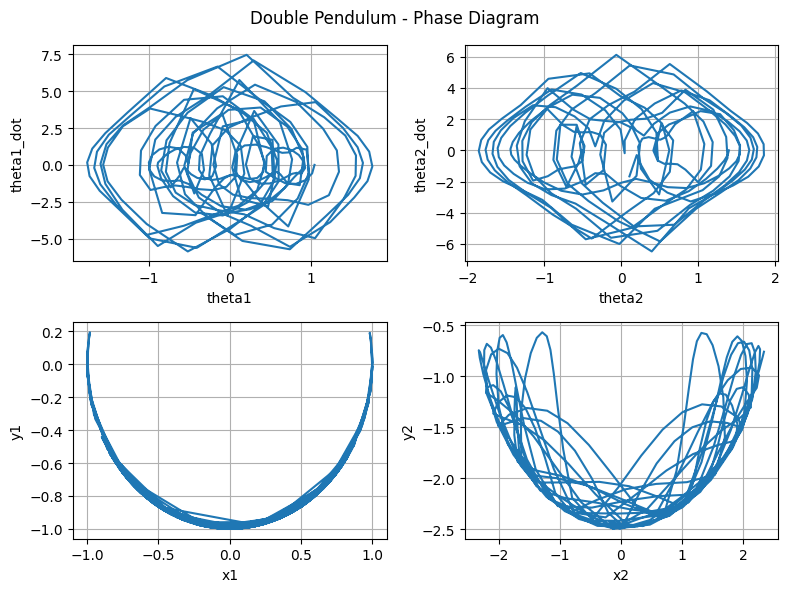

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2,2,figsize=(8, 6))
for i, ax in enumerate(axes.reshape(4,)):
    [x_val, y_val] = list_values[i]
    ax.plot(df2[x_val], df2[y_val])
    ax.set_ylabel(y_val)
    ax.set_xlabel(x_val)
    ax.grid()
fig.suptitle("Double Pendulum - Phase Diagram")
fig.tight_layout()
fig.savefig("fig/double_pendulum_phase_diagram.png", dpi=200, facecolor='white')

MovieWriter imagemagick unavailable; using Pillow instead.


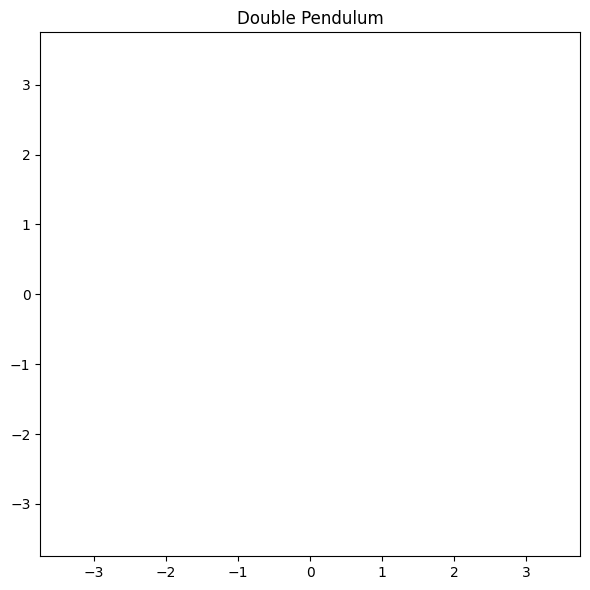

In [14]:
animator2 = DoublePendulumAnimator(df=df2, size=p2.L1+p2.L2)
animator2.init_canvas()
anim2 = animator2.run(frames=int(df2.shape[0]), interval=10)
animator2.save(anim2, gif_file="fig/double_pendulum.gif", fps=60)